In [5]:
import pandas as pd

df = pd.read_csv('diabetes.csv') 

print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Glucose')  
y = df['Glucose']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 614
Testing samples: 154


In [7]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 2))


Mean Absolute Error (MAE): 20.61
Mean Squared Error (MSE): 704.68
R² Score: 0.3


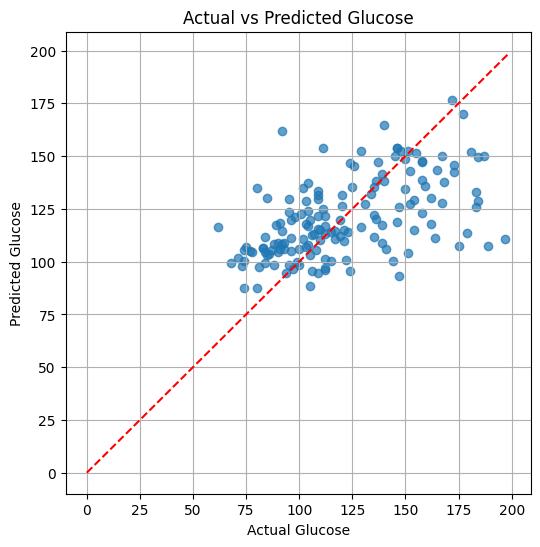

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Actual vs Predicted Glucose")
plt.grid(True)
plt.show()


In [10]:
coefficients = pd.Series(lr_model.coef_, index=X.columns)
print("Intercept:", lr_model.intercept_)
print("Feature Coefficients:")
print(coefficients.sort_values(ascending=False))

Intercept: 78.35793581759754
Feature Coefficients:
Outcome                     23.800274
DiabetesPedigreeFunction     4.427758
Age                          0.409477
BMI                          0.304652
BloodPressure                0.136719
Insulin                      0.098801
Pregnancies                 -0.149322
SkinThickness               -0.393792
dtype: float64
